In [357]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

pose_references = {
    "Front Lat Spread": cv2.imread("latSpread.jpg"),
    "Front Double Bicep": cv2.imread("FrontDoubleBicep.jpg"),
    "Side Tricep": cv2.imread("SideTri.jpg"),
"Most Muscular": cv2.imread("MostMuscular.jpg"),
    "Abs and Thighs" : cv2.imread("AbsThighs.jpg"),
    "Rear Lat Spread" : cv2.imread("RearLatSpread.jpg"),
    "Back Double Bicep" : cv2.imread("Back Double Bicep.jpg"),
    "Side Chest" : cv2.imread("SideChest.jpg"),
"Side Tricep (Left)" : cv2.imread("SideTri.jpg"),
    "Side Chest (Left)" : cv2.imread("SideChest.jpg"),
}

poses_by_orientation = {
    'front': {
        "Front Lat Spread": {
            "left_elbow": (275, 305),
            "right_elbow": (47, 77),
            "left_shoulder": (56, 86),
            "right_shoulder": (58, 88),
            "left_knee": (173, 203),
            "right_knee": (154, 184),
        },
        "Front Double Bicep": {
            "left_elbow": (57, 87),
            "right_elbow": (273, 303),
            "left_shoulder": (98, 128),
            "right_shoulder": (103, 133),
            "left_knee": (182, 212),
            "right_knee": (162, 192),
        },
        "Most Muscular": {
            "left_elbow": (234, 264),
            "right_elbow": (89, 119),
            "left_shoulder": (25, 55),
            "right_shoulder": (14, 44),
            "left_knee": (170, 200),
            "right_knee": (149, 179),
        },
        "Abs and Thighs": {
            "left_elbow": (23, 53),
            "right_elbow": (303, 333),
            "left_shoulder": (154, 184),
            "right_shoulder": (157, 187),
            "left_knee": (175, 205),
            "right_knee": (151, 181),
        },
    },
    'back': {
        "Rear Lat Spread": {
            "left_elbow": (68, 98),
            "right_elbow": (274, 304),
            "left_shoulder": (297, 327),
            "right_shoulder": (285, 315),
            "left_knee": (143, 173),
            "right_knee": (185, 215),
        },


        "Back Double Bicep": {
            "left_elbow": (91, 344),
            "right_elbow": (0, 360),
            "left_shoulder": (0, 360),
            "right_shoulder": (155, 287),
            "left_knee": (94, 211),
        },
    },
    'right_side': {
        "Side Tricep": {
    "left_elbow": (179, 260),  # avg: 214°
    "right_elbow": (164, 243),  # avg: 193°
    "left_shoulder": (0, 48),  # avg: 27°
    "right_shoulder": (0, 360),  # avg: 83°
    "left_knee": (12, 350),  # avg: 161°
    "right_knee": (84, 228),  # avg: 161°
        },
        "Side Chest": {
            "left_elbow": (243, 273),
            "right_elbow": (79, 109),
            "left_shoulder": (9, 39),
            "right_shoulder": (23, 53),
            "left_knee": (104, 134),
            "right_knee": (152, 182),
        },
    },
    'left_side': {
        "Side Tricep (Left)": {
            "left_elbow": (167, 197),
            "right_elbow": (196, 226),
            "left_shoulder": (344, 360),
            "right_shoulder": (12, 42),
            "left_knee": (148, 178),
            "right_knee": (149, 179),
        },
        "Side Chest (Left)": {
           "left_elbow": (48, 298),
    "right_elbow": (68, 180),
    "left_shoulder": (0, 39),
    "right_shoulder": (0, 360),
    "left_knee": (163, 237),
    "right_knee": (162, 221)
        },
    }
}

for key in pose_references:
    pose_references[key] = cv2.resize(pose_references[key],(200,200))


In [358]:
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True,min_detection_confidence=0.3,model_complexity=2)

mp_drawing = mp.solutions.drawing_utils

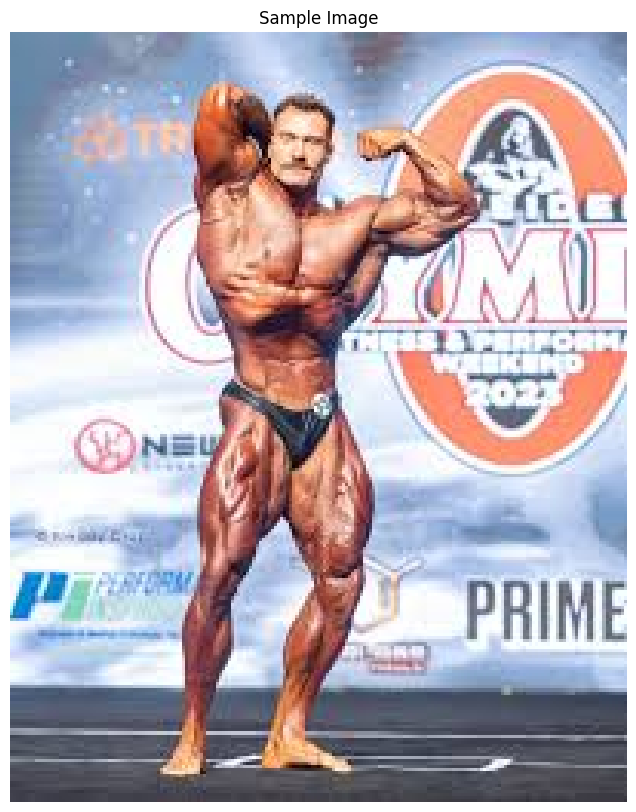

In [359]:
sample_img = cv2.imread('images (1).jpg')
plt.figure(figsize=[10,10])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [360]:
results = pose.process(cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB))

if results.pose_landmarks:
    for i in range(2):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.472903311
y: 0.158992767
z: -0.67814672
visibility: 0.995113432

LEFT_EYE_INNER:
x: 0.482331067
y: 0.144762516
z: -0.63419646
visibility: 0.989727199



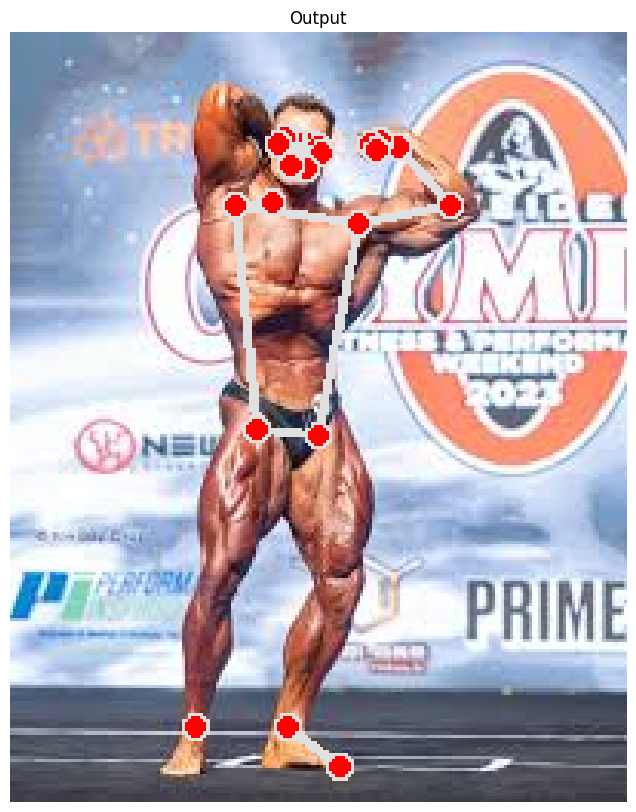

In [361]:
img_copy = sample_img.copy()

if results.pose_landmarks:

     mp_drawing.draw_landmarks(image = img_copy,
     landmark_list = results.pose_landmarks,
    connections = mp_pose.POSE_CONNECTIONS)

     fig = plt.figure(figsize = [10,10])


     plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

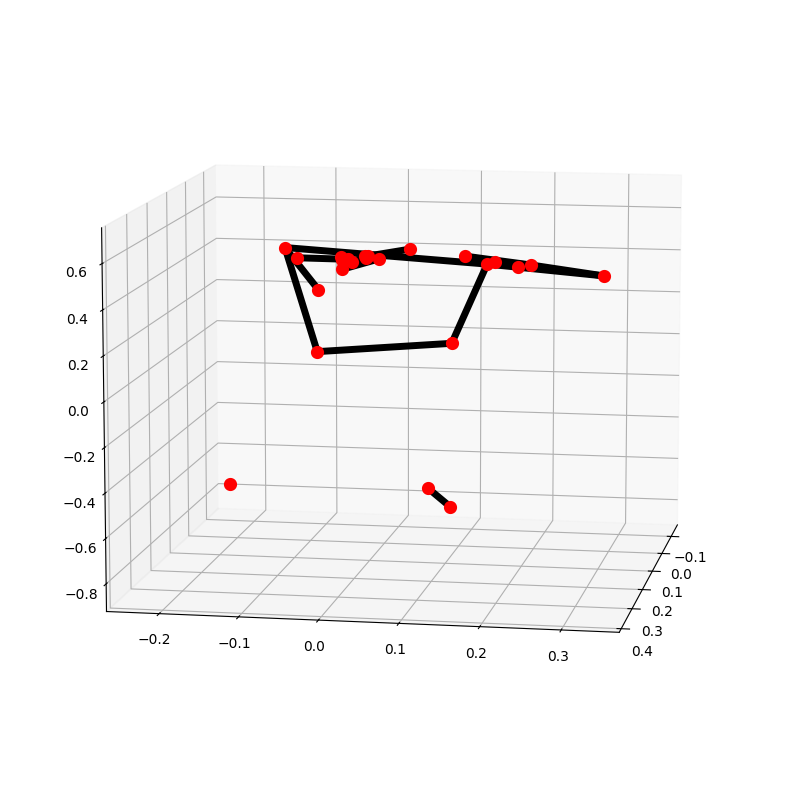

In [362]:
# 3d Calculations
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)


In [363]:
def detectPose(image, pose, display=True):
    """
    Performs pose detection on an image.

    Args:
        image: Input image (BGR)
        pose: Initialized MediaPipe Pose object
        display: If True, show image + 3D plot. If False, return results.

    Returns:
        output_image, landmarks (if display=False)
    """

    # Copy image to draw on
    output_image = image.copy()

    # Convert BGR to RGB
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Pose detection
    results = pose.process(imageRGB)

    # Get image dimensions
    height, width, _ = image.shape

    # List to store landmarks
    landmarks = []

    # If landmarks detected
    if results.pose_landmarks:
        # Draw landmarks
        mp_drawing.draw_landmarks(output_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Convert normalized landmarks to pixel coordinates
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((
                int(landmark.x * width),
                int(landmark.y * height),
                (landmark.z * width)
            ))

    # Display mode
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121); plt.imshow(image[:,:,::-1]); plt.title("Original Image"); plt.axis('off')
        plt.subplot(122); plt.imshow(output_image[:,:,::-1]); plt.title("Output Image"); plt.axis('off')
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    else:
        # Always return tuple
        return output_image, landmarks




In [364]:
def overlay_reference(frame,reference_img):

    if reference_img is None:
        return frame

    h_ref,w_ref,_ = reference_img.shape
    frame_resized = cv2.resize(frame,(frame.shape[1],h_ref))

    combined = cv2.hconcat([frame_resized,reference_img])
    return combined

In [365]:
def pose_tips(angles, target_angles, tolerance=15):
    tips = []
    for joint, (min_angle, max_angle) in target_angles.items():
        actual = angles.get(joint, None)
        if actual is None:
            continue
        if actual < min_angle - tolerance:
            tips.append(f"Raise {joint.replace('_',' ')}")
        elif actual > max_angle + tolerance:
            tips.append(f"Lower {joint.replace('_',' ')}")

    return ", ".join(tips) if tips else "Good form!"  # ✅ CORRECT


In [366]:
def score_joint(angle,min_angle,max_angle):
    #returns score from 0-100 for a single joint angle
    angle = angle % 360
    if min_angle <= angle <= max_angle:
        return 100

    #outside Range -> penalize
    if angle < min_angle:
        diff = min_angle - angle
    else:
        diff = angle - max_angle

    #tolerance
    if diff <= 10:
        return 100 - (diff * 5)

    return max(0,50 - (diff - 10) * 5)

In [367]:
def score_pose(angles, pose_definition):
    joint_scores = []

    for joint, (min_a, max_a) in pose_definition.items():
        if joint not in angles:
            continue

        s = score_joint(angles[joint], min_a, max_a)
        joint_scores.append(s)

    if not joint_scores:
        return 0

    return sum(joint_scores) / len(joint_scores)


In [368]:
def calculateAngle(landmark1,landmark2,landmark3):
    x1,y1,_ = landmark1
    x2,y2,_ = landmark2
    x3,y3,_ = landmark3

    angle = math.degrees(math.atan2(y3-y2,x3-x2)-math.atan2(y1-y2,x1-x2))

    if angle < 0:
        angle += 360

    return angle

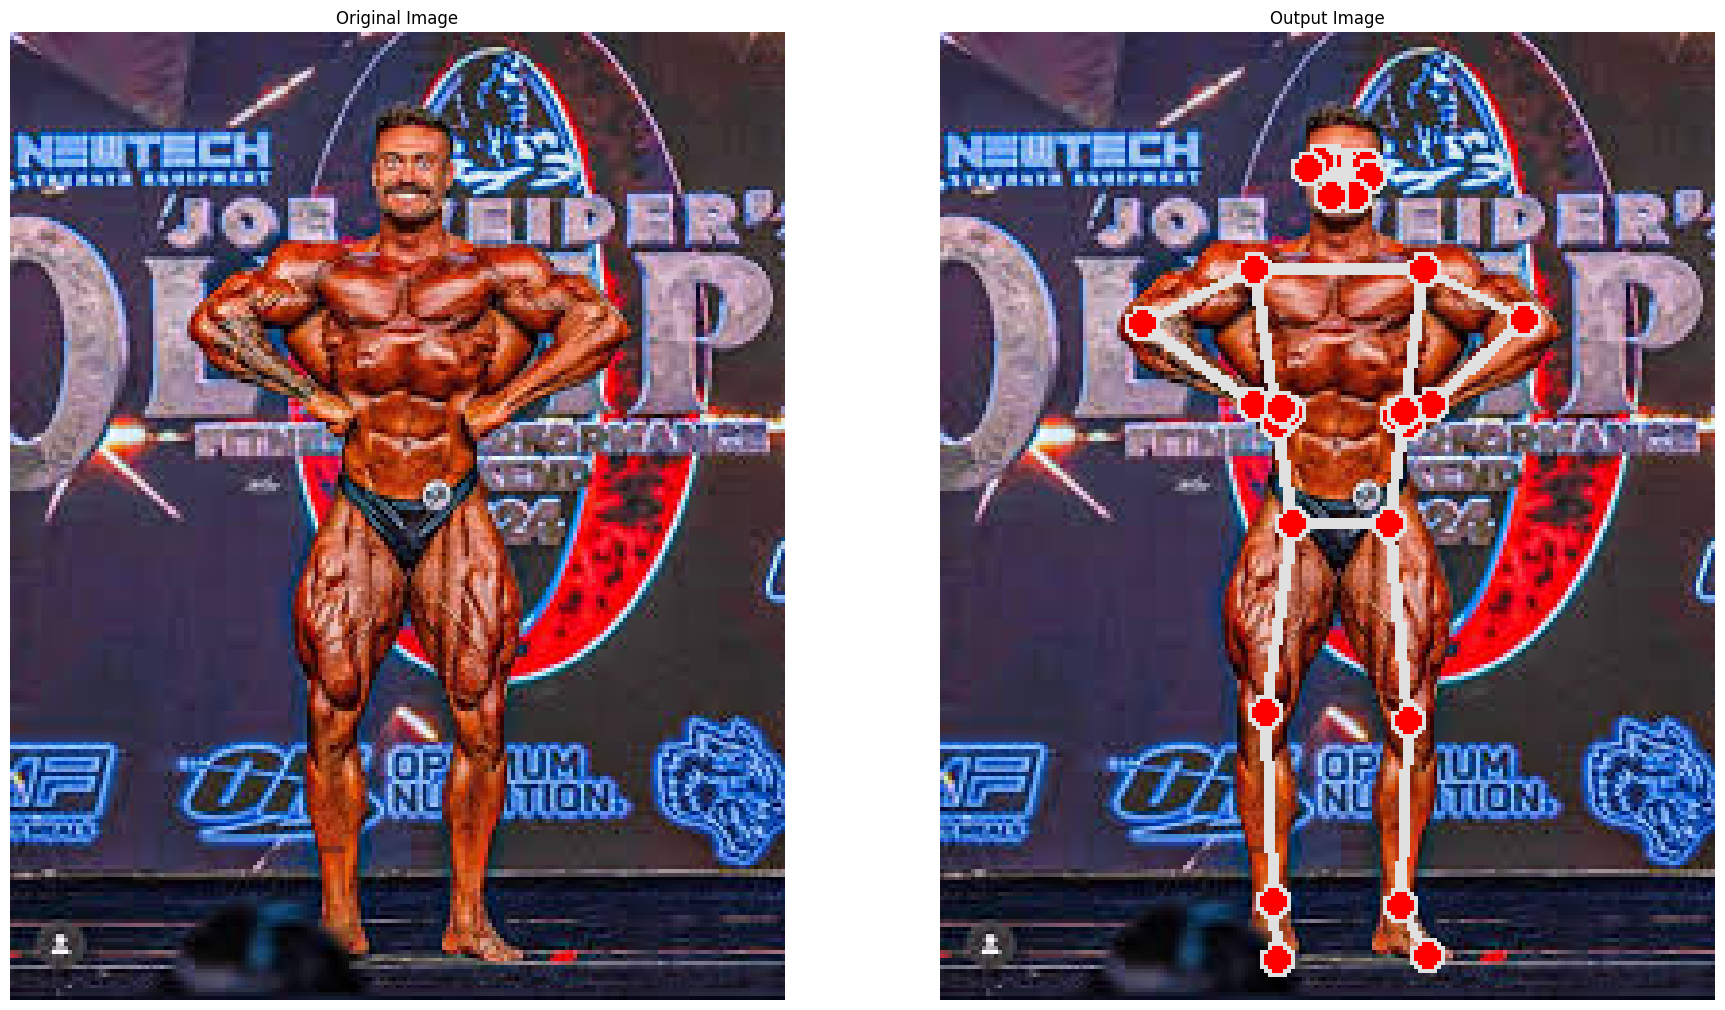

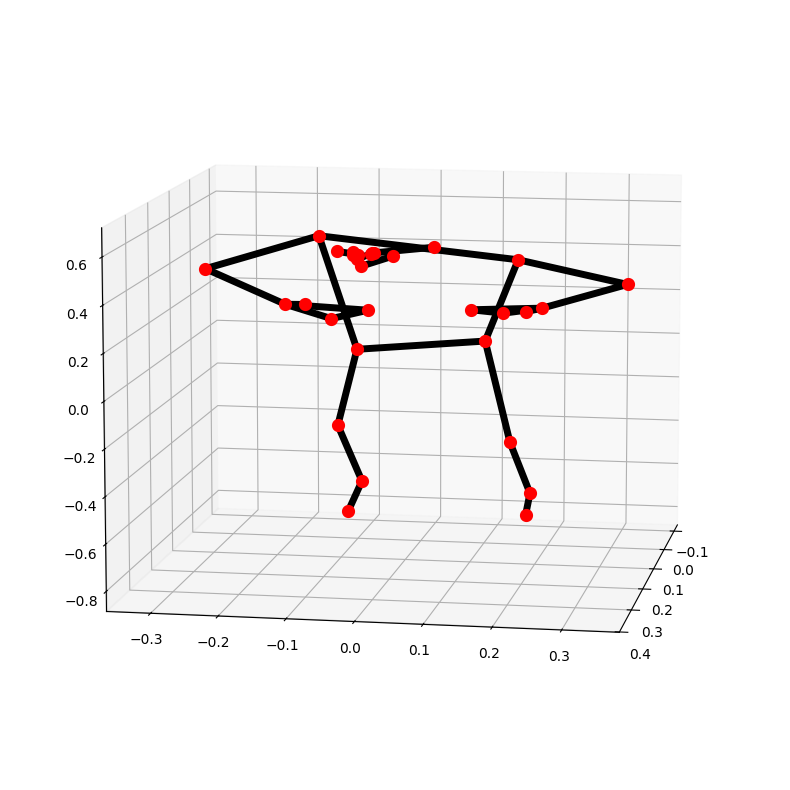


--- ANGLES FOR IMAGE: FrontDoubleBicep.jpg ---
left_elbow : 71.9198351901926
right_elbow : 288.56321148089603
left_shoulder : 113.51002884381057
right_shoulder : 118.56905005615928
left_knee : 197.60841556916608
right_knee : 177.19826008347476


In [369]:
def printPoseAngles(image_path):
    img = cv2.imread(image_path)
    _, landmarks = detectPose(img, pose, display=False)
    if not landmarks:
        print("No landmarks detected.")
        return

    angles = {
        "left_elbow": calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]),

        "right_elbow": calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]),

        "left_shoulder": calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]),

        "right_shoulder": calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                         landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]),

        "left_knee": calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]),

        "right_knee": calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    }

    print("\n--- ANGLES FOR IMAGE:", image_path, "---")
    for k,v in angles.items():
        print(k, ":", v)


image = cv2.imread('latSpread.jpg')
detectPose(image,pose,display=True)
printPoseAngles("FrontDoubleBicep.jpg")


In [370]:
""" Real Time Pose Detection Video Feed With Fps Test
pose_video = mp_pose.Pose(static_image_mode = False,min_detection_confidence=0.5,model_complexity=1)
video = cv2.VideoCapture(0)
cv2.namedWindow('Pose Detection',cv2.WINDOW_NORMAL)

#video.set(3,1280)
#video.set(4,960)

time1 = 0 # Previous Frame Time
while video.isOpened():
    ok, frame = video.read()
    if not ok:
        break

    frame = cv2.flip(frame,1)
    frame_height,frame_width,_ = frame.shape
    frame = cv2.resize(frame,(int(frame_width * (640/frame_height)),640))

    frame,_ = detectPose(frame,pose_video,display=False)


    time2 = time()
    if (time2-time1) > 0:
            frames_per_second = 1.0 / (time2-time1)
            cv2.putText(frame,'FPS: {}'.format(int(frames_per_second)),(10,30),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),3)

    time1 = time2
    cv2.imshow('Pose Detection',frame)
    k = cv2.waitKey(1) & 0xFF
    if (k == 27):# Esc Key
        break

        video.release()
        cv2.destroyAllWindows()
"""

" Real Time Pose Detection Video Feed With Fps Test\npose_video = mp_pose.Pose(static_image_mode = False,min_detection_confidence=0.5,model_complexity=1)\nvideo = cv2.VideoCapture(0)\ncv2.namedWindow('Pose Detection',cv2.WINDOW_NORMAL)\n\n#video.set(3,1280)\n#video.set(4,960)\n\ntime1 = 0 # Previous Frame Time\nwhile video.isOpened():\n    ok, frame = video.read()\n    if not ok:\n        break\n\n    frame = cv2.flip(frame,1)\n    frame_height,frame_width,_ = frame.shape\n    frame = cv2.resize(frame,(int(frame_width * (640/frame_height)),640))\n\n    frame,_ = detectPose(frame,pose_video,display=False)\n\n\n    time2 = time()\n    if (time2-time1) > 0:\n            frames_per_second = 1.0 / (time2-time1)\n            cv2.putText(frame,'FPS: {}'.format(int(frames_per_second)),(10,30),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),3)\n\n    time1 = time2\n    cv2.imshow('Pose Detection',frame)\n    k = cv2.waitKey(1) & 0xFF\n    if (k == 27):# Esc Key\n        break\n\n        video.release()\n   

In [371]:
def detect_body_orientation(landmarks):
    """
    Detects if user is facing FRONT, BACK, LEFT, or RIGHT
    Returns: 'front', 'back', 'left_side', 'right_side'
    """
    # Get key landmarks
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    nose = landmarks[mp_pose.PoseLandmark.NOSE.value]

    # Calculate shoulder width (x-distance)
    shoulder_width = abs(right_shoulder[0] - left_shoulder[0])

    # Calculate hip width
    hip_width = abs(right_hip[0] - left_hip[0])

    # Use Z-depth to determine front/back

    left_shoulder_z = left_shoulder[2]
    right_shoulder_z = right_shoulder[2]
    nose_z = nose[2]

    avg_shoulder_z = (left_shoulder_z + right_shoulder_z) / 2

    # Side pose detection (narrow shoulder width)
    if shoulder_width < 80:
        # Determine which side based on which shoulder is more visible
        if left_shoulder[0] < right_shoulder[0]:
            return 'right_side'  # Right side facing camera
        else:
            return 'left_side'   # Left side facing camera

    # Front vs Back detection
    # If nose is closer (more negative Z) than shoulders = FRONT
    # If nose is further (more positive Z) than shoulders = BACK
    if nose_z < avg_shoulder_z - 0.05:  # Nose closer to camera
        return 'front'
    elif nose_z > avg_shoulder_z + 0.05:  # Nose further from camera
        return 'back'
    else:
        return 'front'  # Default to front if ambiguous

In [372]:
current_Pose = None
pose_lock_timer = 0

POSE_LOCK_FRAMES = 30
DETECTION_THRESHOLD = 75
DROPOUT_THRESHOLD = 50

def classifyPose(landmarks, output_image, display=False):
    global current_pose, pose_lock_timer

    label = 'Relaxed'
    color = (0, 0, 255)

    orientation = detect_body_orientation(landmarks)

    angles = calculate_all_angles(landmarks)

    relevant_poses = poses_by_orientation.get(orientation, {})

    if not relevant_poses:
        cv2.putText(output_image, f"Turn to camera ({orientation})", (10, 30),
                    cv2.FONT_HERSHEY_PLAIN, 2, (0, 165, 255), 2)
        return output_image, label

    pose_scores = {
        pose_name: score_pose(angles, pose_def)
        for pose_name, pose_def in relevant_poses.items()
    }

    best_pose = max(pose_scores, key=pose_scores.get)
    best_score = pose_scores[best_pose]

    DETECTION_THRESHOLD = 75
    DROPOUT_THRESHOLD = 50

    if current_pose is None:
        if best_score > DETECTION_THRESHOLD:
            current_pose = best_pose
            pose_lock_timer = POSE_LOCK_FRAMES
    else:
        if pose_lock_timer > 0:
            pose_lock_timer -= 1
        else:
            if best_score > DETECTION_THRESHOLD:
                current_pose = best_pose
                pose_lock_timer = POSE_LOCK_FRAMES
            elif pose_scores.get(current_pose, 0) < DROPOUT_THRESHOLD:
                current_pose = None

    if best_score > DETECTION_THRESHOLD:
        label = best_pose if current_pose is None else current_pose
        color = (0, 255, 0)
    else:
        label = 'Relaxed'
        color = (0, 0, 255)

    cv2.putText(output_image, f"{label} ({int(best_score)}%) - {orientation.upper()}",
                (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)

    if display:
        plt.figure(figsize=[10, 10])
        plt.imshow(output_image[:, :, ::-1])
        plt.title("Output Image")
        plt.axis('off')
    else:
        return output_image, label


In [373]:
def calculate_all_angles(landmarks):
    return {
        "left_elbow": calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]),
        "right_elbow": calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]),
        "left_shoulder": calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]),
        "right_shoulder": calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                         landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]),
        "left_knee": calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]),
        "right_knee": calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    }


In [374]:
def calibrate_pose_angles(pose_name, duration_seconds=5):
    """
    Records your angles for a specific pose over several seconds
    Returns the min/max ranges automatically. I used this to get the angles for the poses because some images weren't rendering well for the AI
    """
    pose_video = mp.solutions.pose.Pose(
        static_image_mode=False,
        min_detection_confidence=0.5,
        model_complexity=1
    )

    camera = cv2.VideoCapture(0)

    print(f"\n CALIBRATING: {pose_name}")
    print(f"Hold the pose for {duration_seconds} seconds...")
    print("Press SPACE when ready, ESC to cancel")

    while True:
        ok, frame = camera.read()
        frame = cv2.flip(frame, 1)
        cv2.putText(frame, f"Press SPACE to start calibrating {pose_name}",
                    (50, 50), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)
        cv2.imshow("Calibration", frame)

        k = cv2.waitKey(1) & 0xFF
        if k == 32:  # Space
            break
        elif k == 27:  # ESC
            camera.release()
            cv2.destroyAllWindows()
            return None

    # Record angles
    angle_samples = {
        "left_elbow": [],
        "right_elbow": [],
        "left_shoulder": [],
        "right_shoulder": [],
        "left_knee": [],
        "right_knee": []
    }

    start_time = time()

    while time() - start_time < duration_seconds:
        ok, frame = camera.read()
        if not ok:
            continue

        frame = cv2.flip(frame, 1)
        frame, landmarks = detectPose(frame, pose_video, display=False)

        if landmarks:
            angles = calculate_all_angles(landmarks)
            for joint, angle in angles.items():
                angle_samples[joint].append(angle)

        # Show countdown
        remaining = duration_seconds - (time() - start_time)
        cv2.putText(frame, f"Recording... {remaining:.1f}s",
                    (50, 50), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)
        cv2.imshow("Calibration", frame)
        cv2.waitKey(1)

    camera.release()
    cv2.destroyAllWindows()

    # Calculate ranges with tolerance
    calibrated_ranges = {}
    print(f"\n CALIBRATION RESULTS for {pose_name}:")
    print("Copy this into your poses dictionary:\n")
    print(f'"{pose_name}": {{')

    for joint, samples in angle_samples.items():
        if samples:
            min_angle = min(samples)
            max_angle = max(samples)
            avg_angle = sum(samples) / len(samples)

            # Add 15 degree tolerance on each side
            tolerant_min = max(0, min_angle - 15)
            tolerant_max = min(360, max_angle + 15)

            calibrated_ranges[joint] = (tolerant_min, tolerant_max)

            print(f'    "{joint}": ({int(tolerant_min)}, {int(tolerant_max)}),  # avg: {int(avg_angle)}°')

    print("},\n")

    return calibrated_ranges


# USE IT LIKE THIS:
# calibrate_pose_angles("Front Lat Spread", duration_seconds=5)
# calibrate_pose_angles("Side Chest", duration_seconds=5)
# Then copy the output into your poses dictionary if needed depending on what you think some poses are lol.

In [375]:
pose_video = mp.solutions.pose.Pose(
    static_image_mode=False,
    min_detection_confidence=0.5,
    model_complexity=1
)

camera_video = cv2.VideoCapture(0)
camera_video.set(3, 1280)
camera_video.set(4, 960)
cv2.namedWindow("Pose Classification with Reference", cv2.WINDOW_NORMAL)

current_pose = None
pose_lock_timer = 0
POSE_LOCK_FRAMES = 30

while camera_video.isOpened():
    ok, frame = camera_video.read()
    if not ok:
        continue

    frame = cv2.flip(frame, 1)
    frame_height, frame_width, _ = frame.shape
    frame = cv2.resize(frame, (int(frame_width * (640/frame_height)), 640))

    # Detect pose
    frame, landmarks = detectPose(frame, pose_video, display=False)

    if landmarks:
        frame, label = classifyPose(landmarks, frame, display=False)

        angles = calculate_all_angles(landmarks)

        target_angles = poses.get(label, None)
        if target_angles:
            tip_text = pose_tips(angles, target_angles)
        else:
            tip_text = ""

        ref_img = pose_references.get(label, None)
        frame_with_ref = overlay_reference(frame, ref_img)

        # Add tip text
        cv2.putText(frame_with_ref, tip_text, (10, 60),
            cv2.FONT_HERSHEY_PLAIN, 1.5, (0,0,255), 2)

        # Show combined frame
        cv2.imshow("Pose Classification with Reference", frame_with_ref)
    else:
        # If no landmarks detected, just show camera frame
        cv2.imshow("Pose Classification with Reference", frame)

    # Exit
    k = cv2.waitKey(1) & 0xFF
    if k == 27:  # ESC key
        break

# Release after the loop
camera_video.release()
cv2.destroyAllWindows()
